In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt
from scipy import stats

np.random.seed(123)

from pydataset import data

from wrangle_telco import wrangle_telco
from explore import correlation_exploration

# Proof of Concept - Central Limit Theorem

In [14]:
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

In [20]:
# Create 2-d array of random numbers between 1 and 6 to represent ten dice rolls for each column

dataset = np.random.randint(1, 7, (nrows, ncols))

dataset[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [21]:
# Calculate the average for each set of 10 dice rolls

calculated_averages = dataset.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

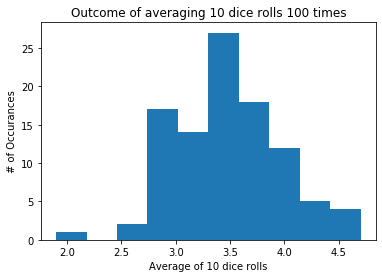

In [23]:
# Visualize the distribution of 100 observations of 10 dice rolls

plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')
plt.show()

## Hypothesis Testing

- one_tailed test looks for a specific difference


- two-tailed test looks for any difference


- one-sample t-test compares the mean of a subgroup withe the population mean.


- two-sample t-test compares the means of two subgroups.


- a confidence interval is a range of values, 90%, 95%, 99.5%, we set up before we begin testing. It states that we are n% sure that our statistic will fall within our set range.


- $a$ = 1 - confidence interval. If your p-value is less than your $a$, which you set before you begin your test, then your test findings are significant. If it is close, it is at your discretion. Your results still may be significant even though slightly above your chosen cutoff.


- p-values are values we obtain from hypothesis testing. They represent the probability that our obtained result is due to chance given that our stated hypothesis is true.

### Hypothesis Testing Errors

- <font color=red>Type I Error == False Positive</font>


    - We predict there is a difference when in reality there is no difference
    - We reject the Null hypothesis when the Null hypothesis is actually True
    
    
- <font color=red>Type II Error == False Negative</font>


    - We predict that there is no difference when in reality there is a difference.
    - We fail to reject the Null hypothesis when the Null hypothesis is actually false.

# T-Test Summary and Examples

- A type of inferential statistic used to determine if there is a significant difference between the means of two groups which may be related in certain features.


    - Compares a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups or the mean of a subgroup to the mean of the population.
    
        - Examples: 
        
        Are sales for group A higher when we run a promotion? 
        Do customers who receive a promotion spend more money?
        

- One Sample T-test is when we compare the mean for a subgroup to the population mean.

- Two Sample T-test is when we compar the mean of one subgroup to the mean of another subgroup.


$H_0$: There is no difference between smokers' tips and the overall tip average.

$H_1$: There is a difference between smokers' tips and the overall tip average.

In [24]:
df = data('tips')

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


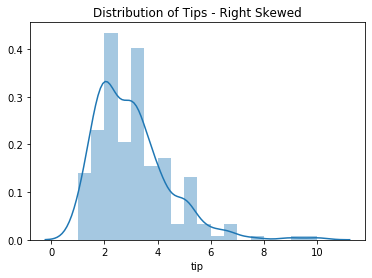

In [26]:
# T-tests assume that the continous variable is normally distributed,
# so we need to do a quick check of this.

sns.distplot(df.tip)
plt.title('Distribution of Tips - Right Skewed')
plt.show()

### Compare mean and median of df.tip

- <font color=green>The distribution is right-skewed, so we see below the mean is slightly higher than the median.

In [27]:
print(f'The mean is: {df.tip.mean()}, and the median is {df.tip.median()}')
print('This is close enough to normal to continue.')

The mean is: 2.9982786885245902, and the median is 2.9
This is close enough to normal to continue.


# Calculate the t-statistic and p-value for a One Sample T-Test by hand

In [28]:
smokers = df[df.smoker == 'Yes']

In [29]:
pop_mean = df.tip.mean()

In [30]:
xbar = smokers.tip.mean()

In [31]:
smokers_standard_dev = smokers.tip.std()

In [32]:
n = smokers.shape[0]

In [33]:
degrees_freedom = n - 1

In [34]:
standard_error = smokers_standard_dev / sqrt(n)

In [35]:
t = (xbar - pop_mean) / (smokers_standard_dev / sqrt(n))

In [36]:
print(f"Our t-statistic for smokers' tips is {t}.")

Our t-statistic for smokers' tips is 0.07177676877620093.


In [37]:
p = stats.t(degrees_freedom).sf(t) * 2

In [38]:
print(f"Our p-value for smokers' tips is {p}")
print(f'This means there is about a {round(p * 100,2)}% chance that we observe the data we have.')

Our p-value for smokers' tips is 0.9429353685499238
This means there is about a 94.29% chance that we observe the data we have.


In [39]:
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.072
p = 0.943


# Calculate the t-statistic and p-value using scipy.stats module

In [40]:
t, p = stats.ttest_1samp(smokers.tip, df.tip.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.072
p = 0.943


## Now THAT is awesome!!!!

# Calculate the t-statistic and p-value for a Two Sample T-Test by hand

In [41]:
males = df[df.sex == 'Male'].tip
females = df[df.sex == 'Female'].tip

In [42]:
males_xbar = males.mean()
females_xbar = females.mean()

In [43]:
males_xbar

3.0896178343949052

In [44]:
females_xbar

2.833448275862069

In [45]:
n_males = males.shape[0]
n_females = females.shape[0]

In [46]:
std_males = males.std()
std_females = females.std()

In [47]:
degrees_freedom = n_males + n_females - 2

In [48]:
s_p = sqrt(((n_males - 1) * std_males + (n_females - 1) * std_females ** 2) / (n_males + n_females - 2))

In [49]:
standard_error = sqrt(std_males ** 2 / n_males + std_females ** 2 / n_females)
standard_error

0.17197939068320425

In [50]:
t = (males_xbar - females_xbar) / (s_p * sqrt(1/n_males + 1/n_females))
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t,3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 1.598.


In [51]:
p = stats.t(degrees_freedom).sf(t) * 2
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')


Our p-value is 0.111.
This means there is about a 11.12% chance that we observe the data we have.


### Again, using scipy.stats.ttest_ind()

- <font color=orange>For some reason, these didn't match up as well. I trust the stats.ttest_ind() more than what I did by hand here.</font>

In [52]:
t, p = stats.ttest_ind(males, females)

In [53]:
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t,3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 1.388.


In [54]:
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')

Our p-value is 0.166.
This means there is about a 16.65% chance that we observe the data we have.


# Exercises

In [55]:
mpg = data('mpg')

In [56]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [57]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [58]:
mpg['avg_mileage'] = (mpg['cty'] + mpg['hwy']) / 2

In [59]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


In [60]:
cars99 = mpg[mpg.year == 1999].avg_mileage
cars99.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mileage, dtype: float64

In [61]:
cars08 = mpg[mpg.year == 2008].avg_mileage
cars08.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mileage, dtype: float64

In [62]:
t, p = stats.ttest_ind(cars99, cars08)
print('t-statistic: ', t)
print('p_value: ', p)

t-statistic:  0.21960177245940962
p_value:  0.8263744040323578


### Are compact cars more fuel-efficient than the average car?


In [63]:
compact = mpg[mpg['class'] == 'compact'].avg_mileage
compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mileage, dtype: float64

In [64]:
compact.mean()

24.21276595744681

In [65]:
all_cars_mean = mpg.avg_mileage.mean()
all_cars_mean

20.14957264957265

In [66]:
t, p = stats.ttest_1samp(compact, all_cars_mean)
print(f't-statistic: {round(t, 3)} and p-value is: {round(p,3)}.')

t-statistic: 7.897 and p-value is: 0.0.


- <font color=green>This seems to be where you get the real difference in avg_mileage, not the year so much.</font>

### Do manual cars get better gas mileage than automatic cars?

In [67]:
auto = mpg[mpg.trans.str.startswith('auto')]
auto.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


In [68]:
manual = mpg[mpg.trans.str.startswith('man')]
manual.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [69]:
t, p = stats.ttest_ind(auto.avg_mileage, manual.avg_mileage )

In [70]:
print(f't-statistic: {round(t, 3)} and p-value is: {round(p,3)}.')

t-statistic: -4.593 and p-value is: 0.0.


- <font color=green>Again, having a manual or automatic transmission seems to make a difference in fuel-efficiency.</font>

# Correlation Summary and Examples

- This test answers the question of samples having a linear relationship.


    - Calculate the Pearson correlation coefficient.
    
        - The Pearson correlation coefficient is a unitless, continuous numerical measure between -1 and 1, where 1 = perfect positive correlation and -1 = perfect negative correlation.
    
    - Calculate the coresponding t-values.
    
    - Test whether the t-values are significant or not.
 
    - We can use `stats.pearsonr(x,y)` to find corr and p-value
    
- <font color=red>Keep in mind that...</font>


    - correlation is not causality!
    
    - correlation measure the linear relationship between 2 variables and not other types of relationships like quadratic or absolute value.
    
    - correlations can be misleading when confoudning variables are ignored.
    
    - correlation tells you nothing about how large the relationship is.

The p-value is: 6.387070246026389e-51. There is 0.0% chance that we see these results by chance.
r = -0.79


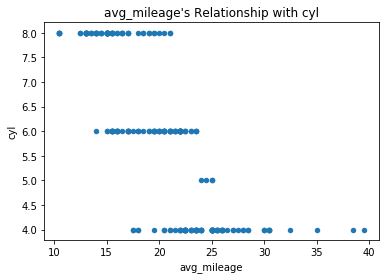

In [72]:
correlation_exploration(mpg, 'avg_mileage', 'cyl')

- <font color=green>It makes sense that the less cylinders a vehicle has, the better the fuel efficiency.</font>

# Exercises

In [73]:
telco = wrangle_telco()

In [74]:
telco.head()

,customer_id,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id
0,0002-ORFBO,65.6,9,593.30,Yes,1
1,0003-MKNFE,59.9,9,542.40,Yes,1
2,0004-TLHLJ,73.9,4,280.85,Yes,2
3,0011-IGKFF,98.0,13,1237.85,Yes,2
4,0013-EXCHZ,83.9,3,267.40,Yes,2


## Use the telco_churn data. 

### Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

The p-value is: 4.320450791022193e-99. There is 0.0% chance that we see these results by chance.
r = 0.25


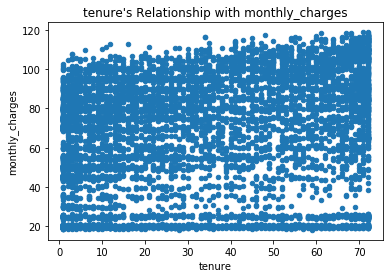

In [75]:
correlation_exploration(telco, 'tenure', 'monthly_charges')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.83


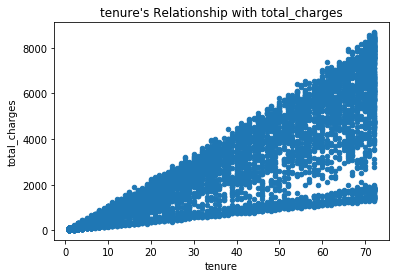

In [76]:
correlation_exploration(telco, 'tenure', 'total_charges')

In [77]:
no_phone_yes_dsl = telco[(telco.phone_service == 'No') & ((telco.internet_service_type_id == 1) | (telco.internet_service_type_id == 2))]
no_phone_yes_dsl


,customer_id,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id
10,0017-DINOC,45.20,54,2460.55,No,1
14,0019-GFNTW,45.05,56,2560.10,No,1
16,0020-JDNXP,61.25,34,1993.20,No,1
19,0023-HGHWL,25.10,1,25.10,No,1
25,0032-PGELS,30.50,1,30.50,No,1
...,...,...,...,...,...,...
6979,9906-NHHVC,53.50,65,3517.90,No,1
6980,9907-SWKKF,25.05,1,25.05,No,1
6996,9928-BZVLZ,49.85,12,552.10,No,1
7016,9955-QOPOY,60.80,69,4263.40,No,1


The p-value is: 4.022392937551241e-64. There is 0.0% chance that we see these results by chance.
r = 0.59


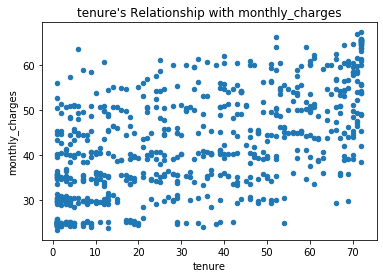

In [78]:
correlation_exploration(no_phone_yes_dsl, 'tenure', 'monthly_charges')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.95


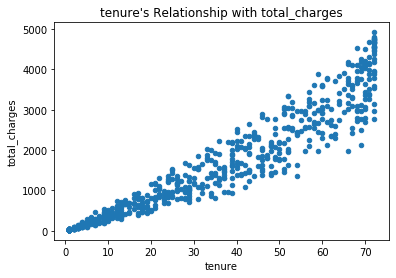

In [79]:
correlation_exploration(no_phone_yes_dsl, 'tenure', 'total_charges')

In [80]:
yes_phone_yes_fiber = telco[telco.internet_service_type_id == 2]
yes_phone_yes_fiber.head()

,customer_id,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id
2,0004-TLHLJ,73.90,4,280.85,Yes,2
3,0011-IGKFF,98.00,13,1237.85,Yes,2
4,0013-EXCHZ,83.90,3,267.40,Yes,2
6,0013-SMEOE,109.70,71,7904.25,Yes,2
7,0014-BMAQU,84.65,63,5377.80,Yes,2


The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.62


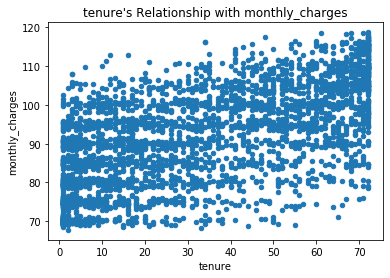

In [81]:
correlation_exploration(yes_phone_yes_fiber, 'tenure', 'monthly_charges')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.99


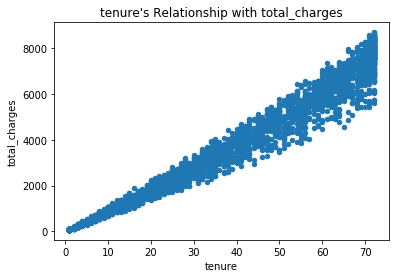

In [82]:
correlation_exploration(yes_phone_yes_fiber, 'tenure', 'total_charges')

- <font color=green>We can see some differences in the correlation depending on the phone and internet services. Customer with Fiber have almost a perfect positive correlation with total_charges. All customers with Fiber internet have phone service, so it is not possible to control for Fiber and phone; it is already controlled.</font>

## Use the sleepstudy data. 

### Is there a relationship between days and reaction time?

In [83]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [84]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [85]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
Reaction    180 non-null float64
Days        180 non-null int64
Subject     180 non-null int64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [86]:
x = sleep.Reaction
x.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

In [87]:
y= sleep.Days
y.head()

1    0
2    1
3    2
4    3
5    4
Name: Days, dtype: int64

The p-value is: 9.894096322214812e-15. There is 0.0% chance that we see these results by chance.
r = 0.54


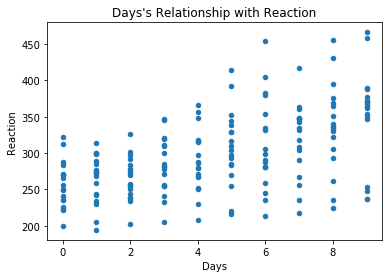

In [91]:
correlation_exploration(sleep, 'Days', 'Reaction')

The p-value is: 9.894096322214812e-15. There is 0.0% chance that we see these results by chance.
r = 0.54


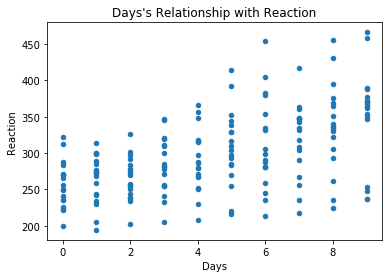

In [92]:
correlation_exploration(sleep, 'Days', 'Reaction')

- <font color=green>There is a positive correlation between Reaction in ms and Days in the study.</font>